In [33]:
import pandas as pd
import numpy as np

import sklearn.metrics as metrics
%matplotlib inline

In [112]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

quant= pd.read_excel("DolQuant.xlsx")
quant["DATA"] = pd.to_datetime(quant["DATA"]).dt.normalize()
quant = quant.set_index("DATA")
quant

,ABERTURA,MÁXIMA,MÍNIMA,FECH.,FECH D-1,ICI 40%,ICI 50%,ICI 60%,ICI 70%,ICI 80%,...,ICS 70%,ICS 80%,QUANT-E1,QUANT-E2,QUANT-E3,QUANT-E4,QUANT-S1,QUANT-S2,PREDIÇÃO,RESULTADO
DATA,,,,,,,,,,,,,,,,,,,,,
2021-09-14,5251,5277.5,5213.0,5263.5,5234.0,5210,5203,5195,5185,5173,...,5287,5299,5222.5,5211.0,5199.5,5188.0,5254,5286,COMPRA,GAIN
2021-09-15,5253,5284.5,5227.0,5242.0,5263.5,5210,5203,5194,5184,5172,...,5286,5298,5275.0,5286.5,5298.0,5309.5,5243,5210,VENDA,GAIN
2021-09-16,5250,5291.5,5243.5,5265.5,5242.0,5212,5204,5196,5186,5174,...,5288,5300,5253.5,5265.0,5276.5,5288.0,5222,5192,VENDA,LOSS
2021-09-17,5269,5358.0,5261.5,5297.0,5265.5,5242,5235,5226,5217,5205,...,5318,5331,5277.0,5288.5,5300.0,5311.5,5239,5213,VENDA,LOSS
2021-09-20,5329,5387.0,5316.5,5338.0,5297.0,5300,5292,5284,5275,5262,...,5376,5388,5317.5,5306.0,5294.5,5283.0,5320,5349,COMPRA,GAIN
2021-09-21,5320,5346.5,5271.5,5280.0,5338.0,5321,5313,5305,5296,5284,...,5397,5409,5326.5,5315.5,5303.5,5292.0,5358,5391,COMPRA,LOSS
2021-09-22,5265,5326.5,5257.0,5299.0,5280.0,5202,5194,5186,5177,5165,...,5278,5291,5291.5,5303.0,5314.5,5326.0,5260,5202,VENDA,LOSS


In [113]:
res = pd.DataFrame()
graf = pd.DataFrame()

In [114]:
res["confdown40"] = np.where(quant["MÍNIMA"] < quant["ICI 40%"], 1, 0)
res["confdown50"] = np.where(quant["MÍNIMA"] < quant["ICI 50%"], 1, 0)
res["confdown60"] = np.where(quant["MÍNIMA"] < quant["ICI 60%"], 1, 0)
res["confdown70"] = np.where(quant["MÍNIMA"] < quant["ICI 70%"], 1, 0)
res["confdown80"] = np.where(quant["MÍNIMA"] < quant["ICI 80%"], 1, 0)
res["confup40"] = np.where(quant["MÁXIMA"] > quant["ICS 40%"], 1, 0)
res["confup50"] = np.where(quant["MÁXIMA"] > quant["ICS 50%"], 1, 0)
res["confup60"] = np.where(quant["MÁXIMA"] > quant["ICS 60%"], 1, 0)
res["confup70"] = np.where(quant["MÁXIMA"] > quant["ICS 70%"], 1, 0)
res["confup80"] = np.where(quant["MÁXIMA"] > quant["ICS 80%"], 1, 0)
res["RESULTADO"] = np.where(quant["RESULTADO"] == "GAIN", 1, 0)

res

,confdown40,confdown50,confdown60,confdown70,confdown80,confup40,confup50,confup60,confup70,confup80,RESULTADO
0,0,0,0,0,0,1,1,1,0,0,1
1,0,0,0,0,0,1,1,1,0,0,1
2,0,0,0,0,0,1,1,1,1,0,0
3,0,0,0,0,0,1,1,1,1,1,0
4,0,0,0,0,0,1,1,1,1,0,1
5,1,1,1,1,1,0,0,0,0,0,0
6,0,0,0,0,0,1,1,1,1,1,0


In [81]:
#res["quantdown1"] = np.where(quant["MÍNIMA"] < quant["QUANT-E1"], 1, 0)
#res["quantdown2"] = np.where(quant["MÍNIMA"] < quant["QUANT-E2"], 1, 0)
#res["quantdown3"] = np.where(quant["MÍNIMA"] < quant["QUANT-E4"], 1, 0)
#res["quantdown4"] = np.where(quant["MÍNIMA"] < quant["QUANT-E4"], 1, 0)
#res["quantup1"] = np.where(quant["MÁXIMA"] > quant["QUANT-S1"], 1, 0)
#res["quantup2"] = np.where(quant["MÁXIMA"] > quant["QUANT-S2"], 1, 0)


In [84]:
for i in res.columns:
    graf["%s" %i]=res["%s" %i].value_counts(normalize=True)*100
graf

,confdown40,confdown50,confdown60,confdown70,confdown80,confup40,confup50,confup60,confup70,confup80,RESULTADO
0,85.714286,85.714286,85.714286,85.714286,85.714286,14.285714,14.285714,14.285714,42.857143,71.428571,57.142857
1,14.285714,14.285714,14.285714,14.285714,14.285714,85.714286,85.714286,85.714286,57.142857,28.571429,42.857143


<AxesSubplot:>

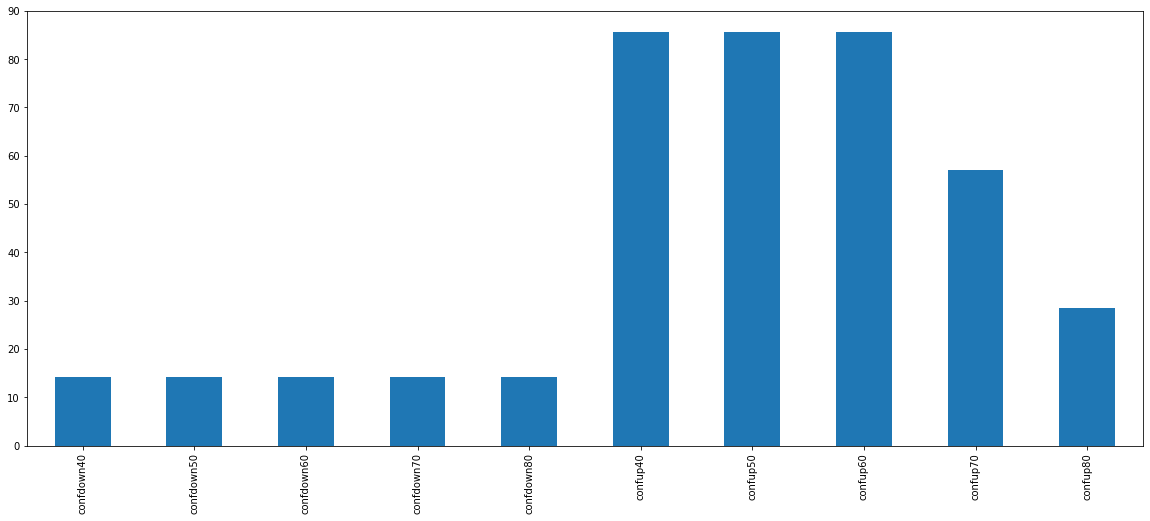

In [85]:
graf = graf.drop(["RESULTADO"], axis=1)
graf.loc[1].plot(kind='bar', figsize=(20,8))

<AxesSubplot:>

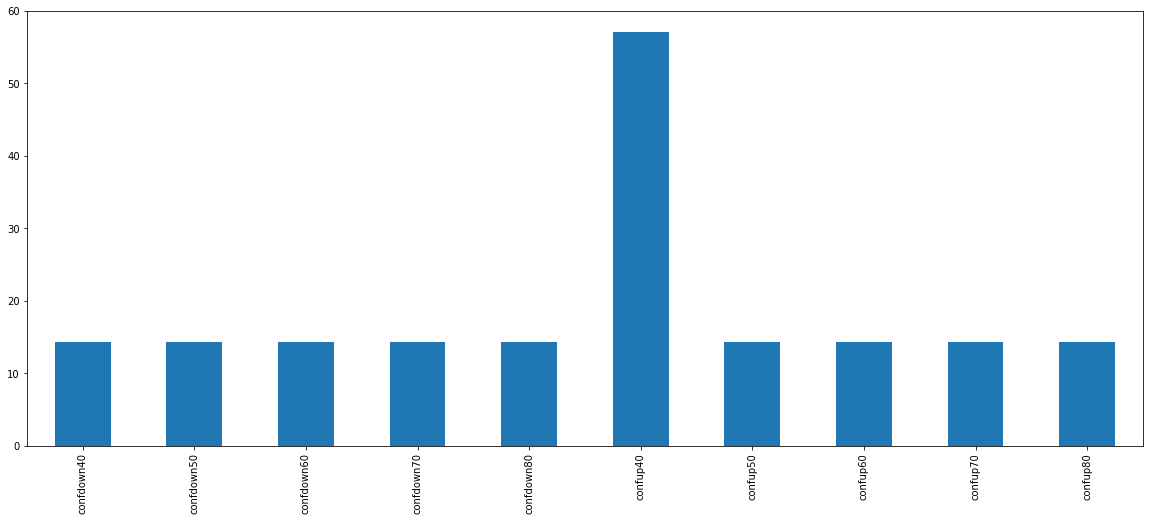

In [90]:
resF = pd.DataFrame()
grafF = pd.DataFrame()

resF["confdown40"] = np.where(quant["FECH."] < quant["ICI 40%"], 1, 0)
resF["confdown50"] = np.where(quant["FECH."] < quant["ICI 50%"], 1, 0)
resF["confdown60"] = np.where(quant["FECH."] < quant["ICI 60%"], 1, 0)
resF["confdown70"] = np.where(quant["FECH."] < quant["ICI 70%"], 1, 0)
resF["confdown80"] = np.where(quant["FECH."] < quant["ICI 80%"], 1, 0)
resF["confup40"] = np.where(quant["FECH."] > quant["ICS 40%"], 1, 0)
resF["confup50"] = np.where(quant["FECH."] > quant["ICS 50%"], 1, 0)
resF["confup60"] = np.where(quant["FECH."] > quant["ICS 60%"], 1, 0)
resF["confup70"] = np.where(quant["FECH."] > quant["ICS 70%"], 1, 0)
resF["confup80"] = np.where(quant["FECH."] > quant["ICS 80%"], 1, 0)
resF["RESULTADO"] = np.where(quant["RESULTADO"] == "GAIN", 1, 0)

for i in resF.columns:
    grafF["%s" %i]=resF["%s" %i].value_counts(normalize=True)*100

grafF = grafF.drop(["RESULTADO"], axis=1)
grafF.loc[1].plot(kind='bar', figsize=(20,8))

In [119]:
resT = pd.DataFrame()
grafT = pd.DataFrame()

resT["conf40"] = np.where((quant["FECH."] >= quant["ICI 40%"] & quant["FECH."] <= quant["ICS 40%"]), 1, 0)
resT["conf50"] = np.where((quant["FECH."] >= quant["ICI 50%"] & quant["FECH."] <= quant["ICS 50%"]), 1, 0)
resT["conf60"] = np.where((quant["FECH."] >= quant["ICI 60%"] & quant["FECH."] <= quant["ICS 60%"]), 1, 0)
resT["conf70"] = np.where((quant["FECH."] >= quant["ICI 70%"] & quant["FECH."] <= quant["ICS 70%"]), 1, 0)
resT["conf80"] = np.where((quant["FECH."] >= quant["ICI 80%"] & quant["FECH."] <= quant["ICS 80%"]), 1, 0)
resT["RESULTADO"] = np.where(quant["RESULTADO"] == "GAIN", 1, 0)

for i in resT.columns:
    grafT["%s" %i]=resT["%s" %i].value_counts(normalize=True)*100

grafT = grafT.drop(["RESULTADO"], axis=1)
grafT.loc[1].plot(kind='bar', figsize=(20,8))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [117]:
resUp = pd.DataFrame()
resDown = pd.DataFrame()

  
resUp = res[res["RESULTADO"] == 1]
resDown = res[res["RESULTADO"] == 0]
#resUp
resDown

,confdown40,confdown50,confdown60,confdown70,confdown80,confup40,confup50,confup60,confup70,confup80,RESULTADO
2,0,0,0,0,0,1,1,1,1,0,0
3,0,0,0,0,0,1,1,1,1,1,0
5,1,1,1,1,1,0,0,0,0,0,0
6,0,0,0,0,0,1,1,1,1,1,0


In [71]:
resUp

In [116]:
grafUp = pd.DataFrame()
grafDown = pd.DataFrame()

for i in resUp.columns:
        grafUp["%s" %i]=resUp["%s" %i].value_counts(normalize=True)*100
        
        
for i in resDown.columns: 
        grafDown["%s" %i]=resDown["%s" %i].value_counts(normalize=True)*100
grafDown
#grafUp

,confdown40,confdown50,confdown60,confdown70,confdown80,confup40,confup50,confup60,confup70,confup80,RESULTADO
0,75.0,75.0,75.0,75.0,75.0,25.0,25.0,25.0,25.0,50.0,100.0
1,25.0,25.0,25.0,25.0,25.0,75.0,75.0,75.0,75.0,50.0,NaN
